In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_ss = pd.read_csv('df_ss.csv')
y = df_ss['class']
X = df_ss.drop(['roster_rank','rank','class','deathType'], axis=1)

In [3]:
X.head()

,roster_members,DBNOs,assists,boosts,kills,killStreaks,headshotKills,roadKills,teamKills,longestKill,damageDealt,heals,revives,rideDistance,swimDistance,walkDistance,timeSurvived,weaponsAcquired
0,4,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-0.071474,0.195163,-0.318406,-0.564602,-0.257126,-0.306593,-0.416715,-0.048114
1,4,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-0.307948,-0.435575,-0.048114
2,4,1.733746,-0.410764,0.051318,0.414189,0.878259,-0.394914,-0.05071,-0.160992,1.326316,0.961706,-0.709011,-0.318406,-0.564602,-0.257126,-0.369169,-0.343439,-0.576447
3,4,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-0.115772,-0.465631,0.979629
4,3,-0.627376,-0.410764,-0.874200,-0.791530,-0.857196,-0.394914,-0.05071,-0.160992,-0.807814,-1.434379,-0.709011,-0.318406,-0.564602,-0.257126,-1.062670,-1.754486,-2.594066


In [10]:
def get_dimension_reduction(feature, components, target=None) :
    
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA, TruncatedSVD, NMF
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    def get_pca(feature, components) :
        pca = PCA(n_components=components)
        pca.fit(feature)
        feature_pca = pca.transform(feature)
        print("PCA : {}\nSum: {:.3f}".format(pca.explained_variance_ratio_,np.sum(pca.explained_variance_ratio_)))
        return feature_pca

    def get_tsvd(feature, components) :
        tsvd = TruncatedSVD(n_components=components)
        tsvd.fit(feature)
        feature_tsvd = tsvd.transform(feature)
        print("TSVD : {}\nSum: {:.3f}".format(tsvd.explained_variance_ratio_,np.sum(tsvd.explained_variance_ratio_)))
        return feature_tsvd

    def get_lda(feature, components, target) :
        lda = LinearDiscriminantAnalysis(n_components=components)
        lda.fit(feature, target)
        feature_lda = lda.transform(feature)
        print("LDA : {}\nSum: {:.3f}".format(lda.explained_variance_ratio_, np.sum(lda.explained_variance_ratio_)))
        return feature_lda

    def get_nmf(feature, components) :
        nmf = NMF(n_components=components)
        nmf.fit(feature)
        feature_nmf = nmf.transform(feature)
        return feature_nmf
    
    # StandardScaler 적용
#     feature_scaled = StandardScaler().fit_transform(feature)
    
    # Scaler 적용 안하려면 
    feature_scaled = feature
    
    if len(target) > 0 and np.min(feature_scaled).min() >= 0 :
        
        feature_pca = get_pca(feature_scaled, components)
        feature_tsvd = get_tsvd(feature_scaled, components)
        feature_lda = get_lda(feature_scaled, components, target)
        feature_nmf = get_nmf(feature_scaled, components)

        return feature_pca, feature_tsvd, feature_nmf, feature_lda
    
    elif len(target) < 0 and np.min(feature_scaled).min() >= 0 :
        
        feature_pca = get_pca(feature_scaled, components)
        feature_tsvd = get_tsvd(feature_scaled, components)
        feature_nmf = get_nmf(feature_scaled, components)
        
        return feature_pca, feature_tsvd, feature_nmf
    
    elif len(target) < 0 and np.min(feature_scaled).min() < 0 :
        feature_pca = get_pca(feature_scaled, components)
        feature_tsvd = get_tsvd(feature_scaled, components)
        
        return feature_pca, feature_tsvd
    
    elif len(target) > 0 and np.min(feature_scaled).min() < 0 :
        feature_pca = get_pca(feature_scaled, components)
        feature_tsvd = get_tsvd(feature_scaled, components)
        feature_lda = get_lda(feature_scaled, components, target)
        
        return feature_pca, feature_tsvd, feature_lda 

In [100]:
feature_pca, feature_tsvd, feature_lda = get_dimension_reduction(X, 2, y)
def create_df(feature_, columns, target) :
    df = pd.DataFrame(feature_, columns=columns)
    df['target'] = target
    return df

col = [ str(i) + '_com' for i in range(1,3)]
pca_df = create_df(feature_pca, col, y)
tsvd_df = create_df(feature_tsvd, col, y)

PCA : [0.34532282 0.12228538]
Sum: 0.468
TSVD : [0.15262079 0.27123914]
Sum: 0.424


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LDA : [1.]
Sum: 1.000


In [93]:
pca_df.head()

,com1,com2,com3,com4,com5,com6,com7,com8,com9,com10,com11,com12,com13,com14,target
0,-1.562680,-0.962493,1.067801,-0.202353,-0.506324,-0.063769,0.825600,-0.119879,0.115617,0.275072,0.748678,-0.084742,-0.809323,0.321397,0
1,-2.189299,-1.097779,1.084912,-0.275152,-0.423373,-0.020332,0.898990,0.078373,0.212187,0.701563,0.161545,-0.556134,0.372376,0.445001,0
2,0.867570,1.365122,2.042855,-0.408901,-0.477783,0.207505,1.419159,-0.140449,0.174134,-0.945231,-0.047635,-0.056936,0.324001,-0.632267,0
3,-1.873851,-1.380078,0.824430,-0.348886,-0.504269,-0.220311,1.092185,-0.004072,0.666174,0.879399,0.038657,-0.356023,0.325792,0.938720,0
4,-3.589578,0.440522,1.320082,0.100635,-0.007052,0.493704,-0.105746,0.313313,-1.046365,0.003653,0.397342,-0.665254,0.388808,-0.448180,0


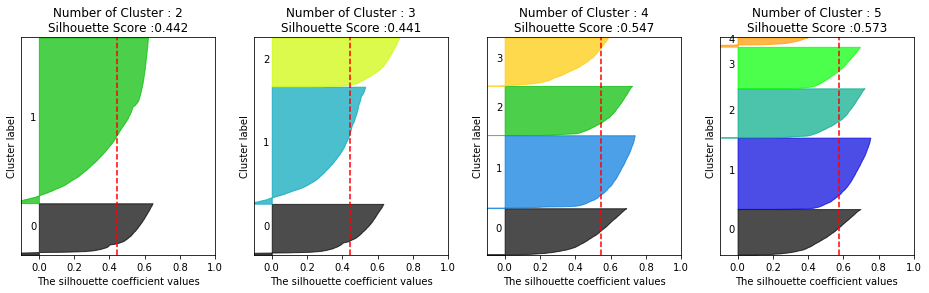

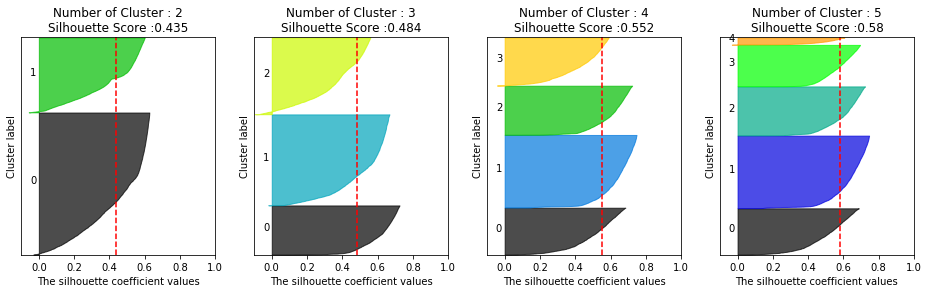

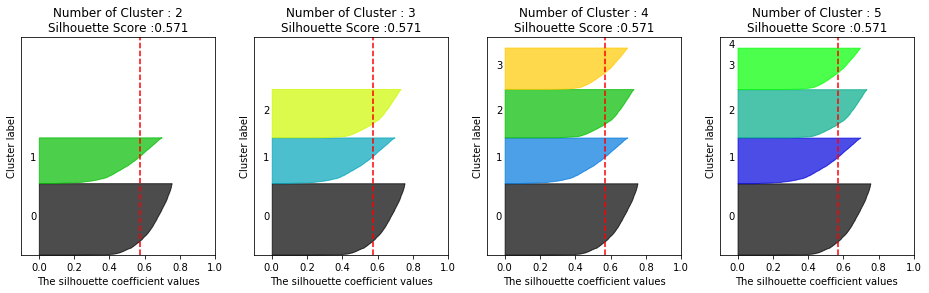

In [120]:
### 여러개의 클러스터링 개수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_model, cluster_lists, X_feature): 
    
    from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        if cluster_model == 'kmeans' :
            # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
            clusterer = KMeans(n_clusters = n_cluster, max_iter=300, random_state=0)

        elif cluster_model == 'gmm' :
            # GMM
            clusterer = GaussianMixture(n_components=n_cluster, random_state=0)
            
        elif cluster_model == 'dbscan' :
            clusterer = DBSCAN(eps=0.8, min_samples=150, metric='euclidean')

        cluster_labels = clusterer.fit_predict(X_feature)
        sil_avg = silhouette_score(X_feature, cluster_labels)
        sil_values = silhouette_samples(X_feature, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_feature) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# (모델명, 군집개수 리스트, x_feature)
visualize_silhouette('gmm', [2,3,4,5], pca_df)
visualize_silhouette('kmeans', [2,3,4,5], pca_df)
visualize_silhouette('dbscan', [2,3,4,5], pca_df) # DBSCAN은 클러스터 4개로 자동 산출, score만 비교

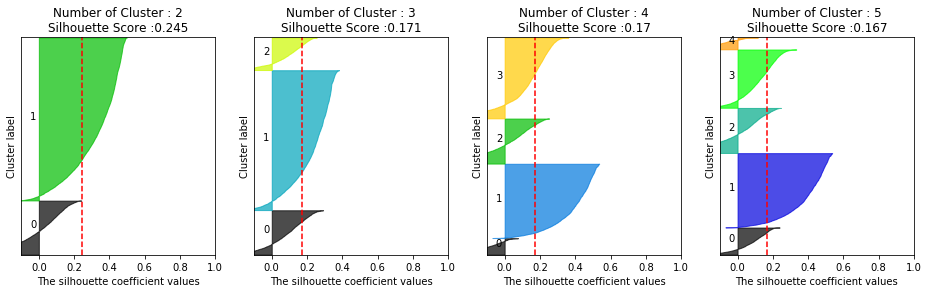

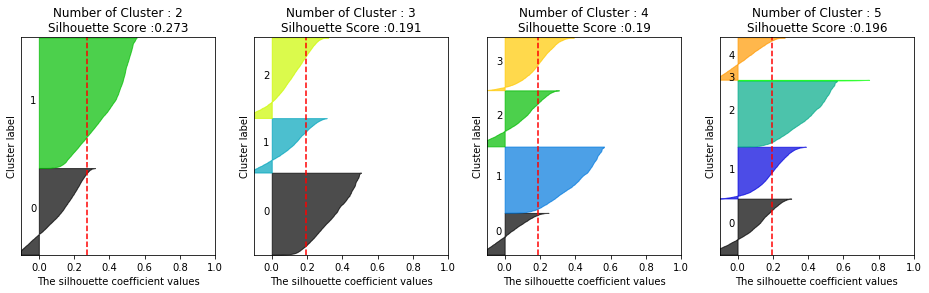

In [95]:
visualize_silhouette('gmm', [2,3,4,5], tsvd_df)
visualize_silhouette('kmeans', [2,3,4,5], tsvd_df)

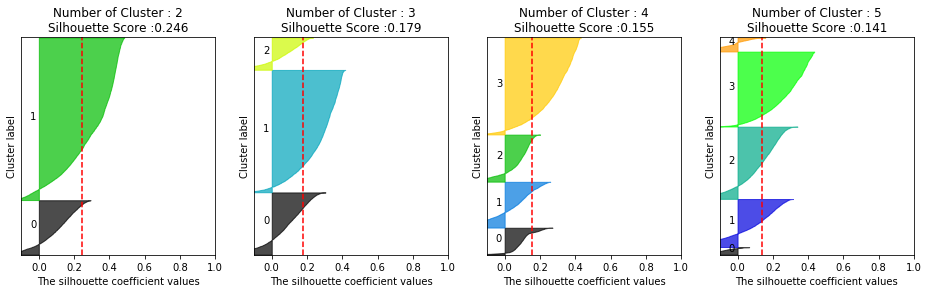

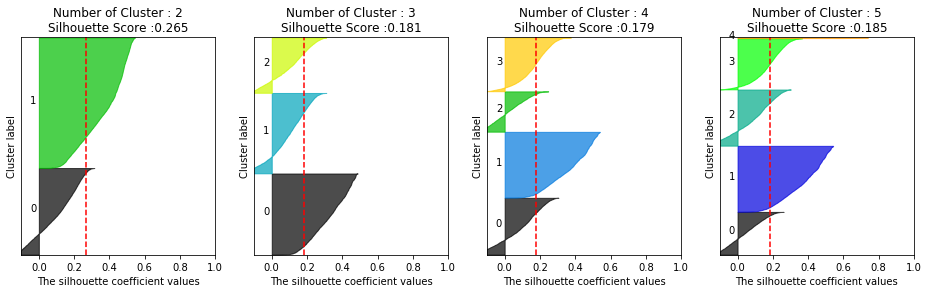

In [98]:
visualize_silhouette('gmm', [2,3,4,5], X)
visualize_silhouette('kmeans', [2,3,4,5], X)

In [99]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.25)
print('bandwidth 값:', round(bandwidth, 3))

meanshift= MeanShift(bandwidth=bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

# 군집이 0~7, 총 8개로 너무 세분화된 군집 결과

bandwidth 값: 4.464
cluster labels 유형: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [103]:
feature_pca, feature_tsvd, feature_lda = get_dimension_reduction(X, 2, y)
def create_df(feature_, columns, target) :
    df = pd.DataFrame(feature_, columns=columns)
    df['target'] = target
    return df

col = [ str(i) + '_com' for i in range(1,3)]
pca_df = create_df(feature_pca, col, y)
tsvd_df = create_df(feature_tsvd, col, y)

bandwidth = estimate_bandwidth(pca_df, quantile=0.15)
print('bandwidth 값:', round(bandwidth, 3))

meanshift= MeanShift(bandwidth=bandwidth)
cluster_labels = meanshift.fit_predict(pca_df)
print('cluster labels 유형:', np.unique(cluster_labels))

bandwidth = estimate_bandwidth(tsvd_df, quantile=0.15)
print('bandwidth 값:', round(bandwidth, 3))

meanshift= MeanShift(bandwidth=bandwidth)
cluster_labels = meanshift.fit_predict(tsvd_df)
print('cluster labels 유형:', np.unique(cluster_labels))

PCA : [0.34532282 0.12228543]
Sum: 0.468
TSVD : [0.15262079 0.27123913]
Sum: 0.424
LDA : [1.]
Sum: 1.000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(18, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


bandwidth 값: 1.604
cluster labels 유형: [0 1]
bandwidth 값: 1.568
cluster labels 유형: [0 1]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


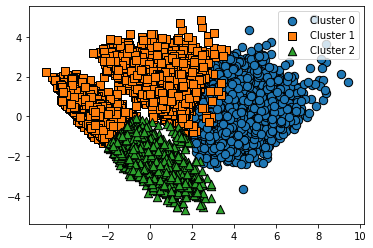

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


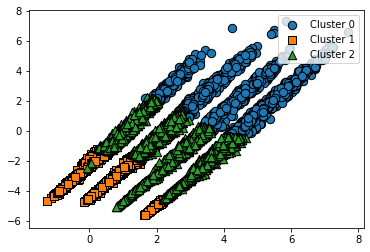

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


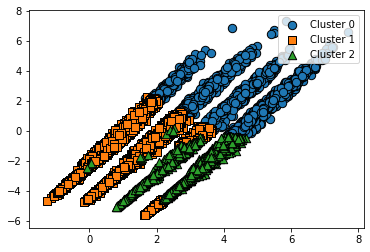

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


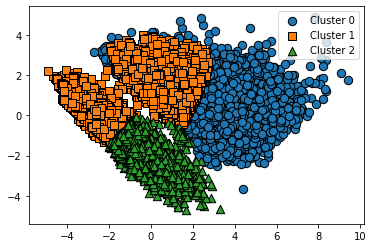

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=None, p=None)


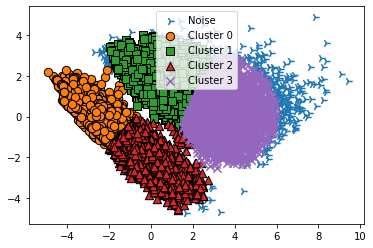

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=None, p=None)


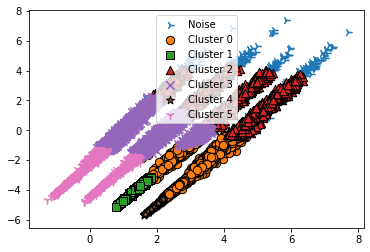

In [109]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(cluster_model, n_clu, X_feature):
    from sklearn.cluster import KMeans, DBSCAN
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.mixture import GaussianMixture
    
    if cluster_model == 'kmeans' :
        clusterer = KMeans(n_clusters=n_clu, init='k-means++', max_iter=500, random_state=0)
    
#     elif cluster_model == 'meanshift' :
#         bandwidth = estimate_bandwidth(pca_df, quantile=0.25)
#         print('bandwidth 값:', round(bandwidth, 3))
#         meanshift= MeanShift(bandwidth=bandwidth)
#         cluster_labels = meanshift.fit_predict(tsvd_df)
#         print('bandwidth 값:', round(bandwidth, 3),'\ncluster labels 유형:', np.unique(cluster_labels))
        
    elif cluster_model == 'gmm' :
        clusterer = GaussianMixture(n_components=n_clu, random_state=0)
        
    elif cluster_model == 'dbscan' :
        clusterer = DBSCAN(eps=0.8, min_samples=150, metric='euclidean')
    
    print(clusterer)
    clusterer_label = clusterer.fit_predict(X_feature)
    X_feature[cluster_model] = clusterer_label
        
    unique_labels = np.unique(X_feature[cluster_model].values)
    markers=['o', 's', '^', 'x', '*', '1', '2', '3', '4']
    isNoise=False
    
    # DBSCAN의 Noise 처리를 위해 필요한 함수
    for label in unique_labels:
        label_cluster = X_feature[X_feature[cluster_model]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['1_com'], y=label_cluster['2_com'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()
    
visualize_cluster_plot('kmeans', 3, pca_df)
visualize_cluster_plot('kmeans', 3, tsvd_df)
visualize_cluster_plot('gmm', 3, tsvd_df)
visualize_cluster_plot('gmm', 3, pca_df)
visualize_cluster_plot('dbscan', 3, pca_df)
visualize_cluster_plot('dbscan', 3, tsvd_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


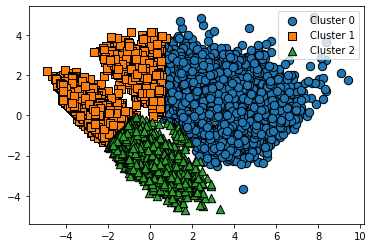

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


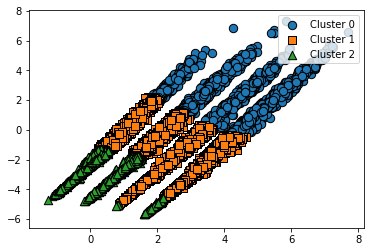

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


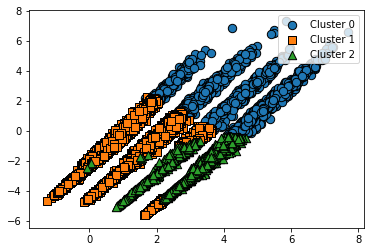

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


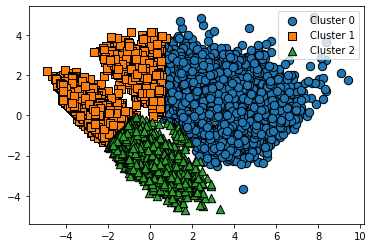

In [107]:
visualize_cluster_plot('kmeans', 3, pca_df)
visualize_cluster_plot('kmeans', 3, tsvd_df)
visualize_cluster_plot('gmm', 3, tsvd_df)
visualize_cluster_plot('gmm', 3, pca_df)

In [156]:
# Olny DBSCAN
def visualize_cluster_plot_dbscan(clusterer, X_feature):
    from sklearn.cluster import KMeans, DBSCAN
    from sklearn.cluster import MeanShift, estimate_bandwidth
    from sklearn.mixture import GaussianMixture
    
    print(clusterer)
    clusterer_label = clusterer.fit_predict(X_feature)
    X_feature['dbscan'] = clusterer_label
        
    unique_labels = np.unique(X_feature['dbscan'].values)
    markers=['o', 's', '^', 'x', '*', '1', '2', '3', '4']
    isNoise=False
    
    # DBSCAN의 Noise 처리를 위해 필요한 함수
    for label in unique_labels:
        label_cluster = X_feature[X_feature['dbscan']==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['1_com'], y=label_cluster['2_com'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [182]:
from sklearn.cluster import DBSCAN
user_df = pd.read_csv('user_df2.csv')

In [190]:
pca_df.iloc[:,:2]

,1_com,2_com
0,-1.562680,-0.962491
1,-2.189299,-1.097853
2,0.867570,1.365132
3,-1.873850,-1.380151
4,-3.589578,0.440471
...,...,...
13020,2.784526,0.089713
13021,2.209552,1.198927
13022,3.630864,-0.800655
13023,0.257983,1.986350


 0    7180
 1    5271
-1     574
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


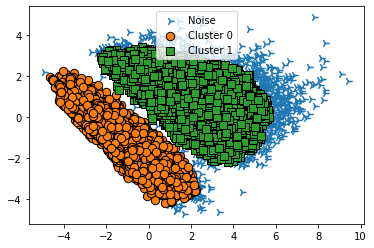

 0    7116
 1    4835
-1    1074
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


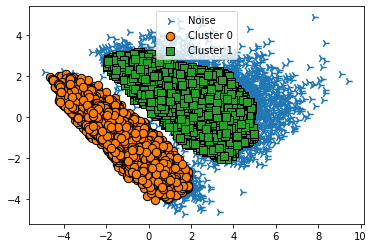

 0    7081
 1    4458
-1    1486
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


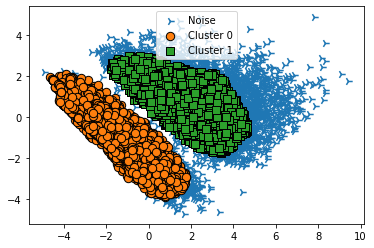

 0    7034
 1    4129
-1    1862
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


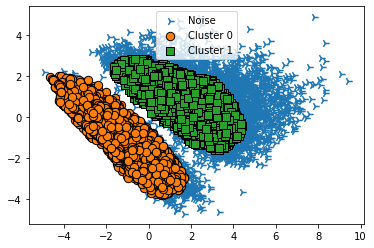

 0    6824
 1    3546
-1    2655
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


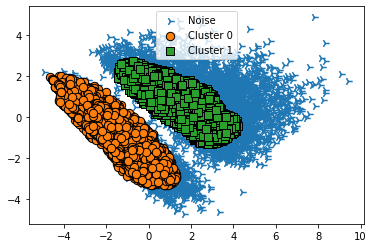

 0    7221
 1    5529
-1     275
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


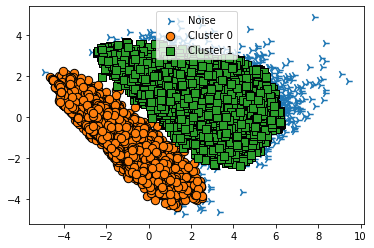

 0    7188
 1    5330
-1     507
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


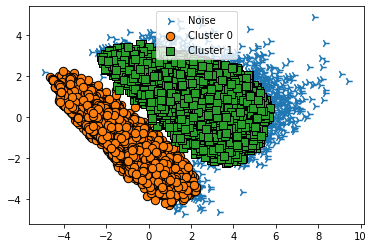

 0    7172
 1    5141
-1     712
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


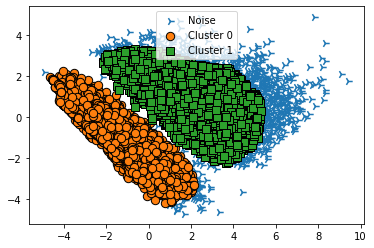

 0    7152
 1    4964
-1     909
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


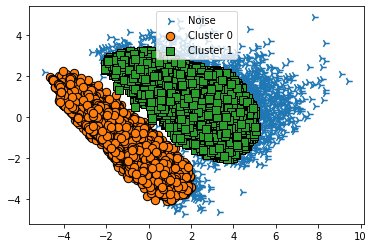

 0    7110
 1    4629
-1    1286
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


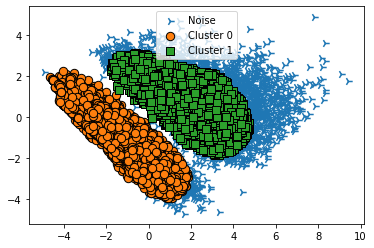

 0    12916
-1      109
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


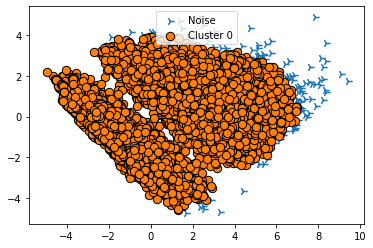

 0    7228
 1    5529
-1     268
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


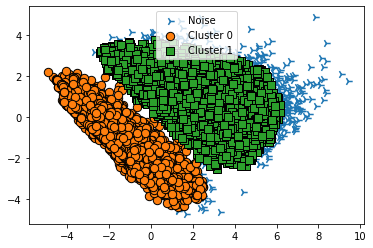

 0    7215
 1    5444
-1     366
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


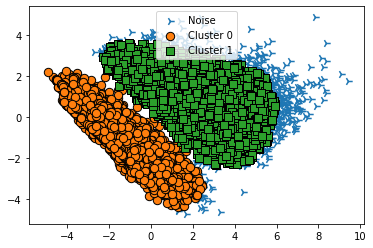

 0    7200
 1    5341
-1     484
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


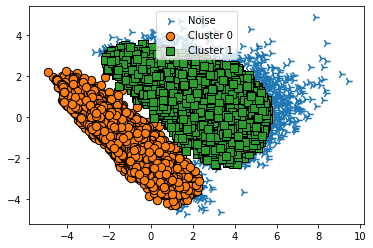

 0    7187
 1    5185
-1     653
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


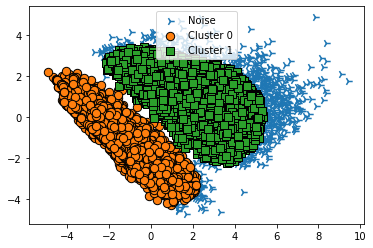

 0    12984
-1       41
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


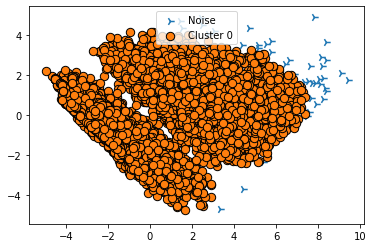

 0    12902
-1      123
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


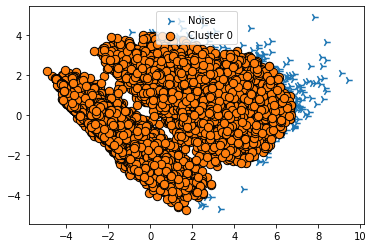

 0    12844
-1      181
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


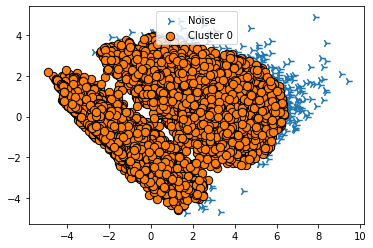

 0    12778
-1      247
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


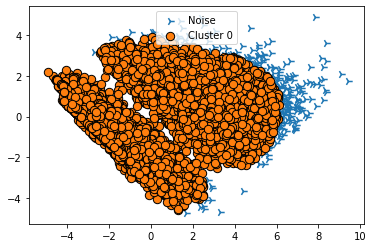

 0    12647
-1      378
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


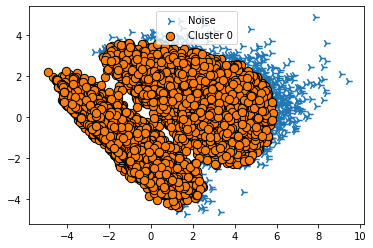

 0    12995
-1       30
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


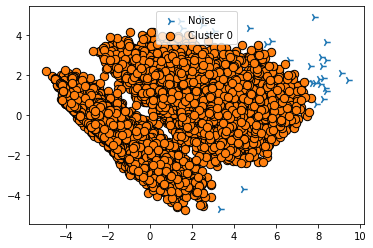

 0    12978
-1       47
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


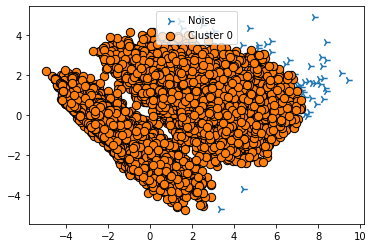

 0    12937
-1       88
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


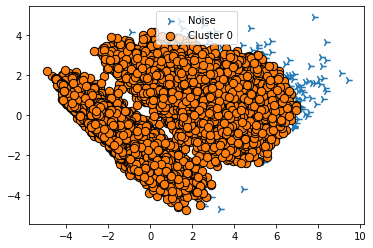

 0    12901
-1      124
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=120, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


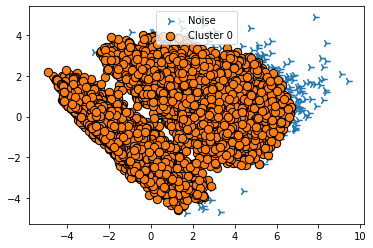

 0    12841
-1      184
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=150, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


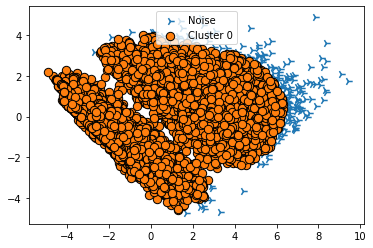

In [191]:
eps_list = [0.4, 0.5, 0.6, 0.7, 0.8]
min_list = [50, 80, 100, 120, 150]
for eps in eps_list :
    for min_value in min_list :
        dbscan = DBSCAN(eps=eps, min_samples=min_value, metric='euclidean', n_jobs=-1)
        clusterer_label = dbscan.fit_predict(pca_df.iloc[:,:2])
        pca_df['dbscan'] = clusterer_label
        print(pca_df['dbscan'].value_counts())
        visualize_cluster_plot_dbscan(dbscan, pca_df.iloc[:,:2])


 0    7228
 1    5529
-1     268
Name: dbscan, dtype: int64
DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=80, n_jobs=-1, p=None)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


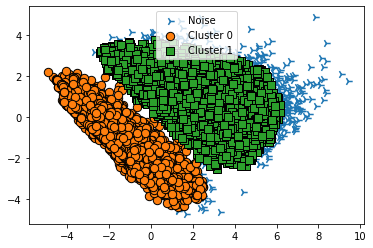

In [192]:
dbscan = DBSCAN(eps=0.6, min_samples=80, metric='euclidean', n_jobs=-1)
clusterer_label = dbscan.fit_predict(pca_df.iloc[:,:2])
pca_df['dbscan'] = clusterer_label
print(pca_df['dbscan'].value_counts())
visualize_cluster_plot_dbscan(dbscan, pca_df.iloc[:,:2])
for c in pca_df.columns :
    user_df[c] = pca_df[c]

In [193]:
user_df['dbscan'].value_counts()

 0    7228
 1    5529
-1     268
Name: dbscan, dtype: int64

In [194]:
cols = ['roster_members', 'roster_rank', 'DBNOs', 'assists', 'boosts', 'kills', 'killStreaks', 'headshotKills', 'roadKills', 'teamKills', 'longestKill', 'damageDealt', 'heals', 
        'revives', 'rideDistance', 'swimDistance', 'walkDistance', 'timeSurvived', 'weaponsAcquired','dbscan']

In [196]:
np.round(user_df[cols].groupby(['dbscan']).mean(),1)

,roster_members,roster_rank,DBNOs,assists,boosts,kills,killStreaks,headshotKills,roadKills,teamKills,longestKill,damageDealt,heals,revives,rideDistance,swimDistance,walkDistance,timeSurvived,weaponsAcquired
dbscan,,,,,,,,,,,,,,,,,,,
-1,2.7,11.5,3.1,1.1,5.8,5.4,1.8,1.7,0.0,0.0,115.4,597.2,5.5,0.7,2101.7,10.6,2138.3,1274.1,5.5
0,2.4,32.4,0.1,0.1,0.8,0.0,0.0,0.0,0.0,0.0,0.0,35.3,0.9,0.1,484.2,3.5,760.1,482.2,3.1
1,2.4,21.7,1.0,0.3,2.5,1.9,1.2,0.4,0.0,0.0,44.9,219.3,2.2,0.2,719.2,6.4,1416.6,799.9,4.4
